### Import Data:

In [183]:
import pandas as pd
import numpy as np
import scipy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
!wget -O boston_housing.csv "https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv" --no-check-certificate

--2021-06-05 13:19:39--  https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Length: 41295 (40K) [text/plain]
Saving to: 'boston_housing.csv'

     0K .......... .......... .......... ..........           100% 4.54M=0.009s

2021-06-05 13:19:40 (4.54 MB/s) - 'boston_housing.csv' saved [41295/41295]



In [108]:
df=pd.read_csv("boston_housing.csv", header=None)
df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7


### Standard Scaler:

In [192]:
X, y = df.iloc[:, :-1].values, df.iloc[:, -1].values

In [193]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [194]:
X

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [195]:
print(X.shape, y.shape)

(506, 13) (506,)


In [196]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [197]:
X_train.shape

(339, 13)

## Baseline Model

In [198]:
model = LinearRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
yhat

array([32.45826885, 28.03728153, 17.93647207, 21.2832492 , 18.42483932,
       20.26442416, 32.68163869, 17.8901368 , 25.20430254, 26.50324837,
       27.44636554, 28.774597  , 20.69904879, 26.7287059 , 23.07228784,
       20.56904299, 17.81703559, 38.5881921 , 30.29195442,  8.25216261,
       20.43766045, 15.8309292 , 25.0960829 , 24.69781835, 31.35504827,
       11.02487322, 13.75508415, 16.41703401, 36.08411878, 14.56147642,
       21.26785937, 13.91919838, 43.63932825, 18.10575644, 21.28183801,
       20.21300053, 17.73731543, 27.11063697,  9.14209558, 20.08335439,
       23.80093981, 21.00996159, 29.24165661, 16.69939026, 19.58780033,
       15.07888798, 40.4624702 , 18.18519341, 25.86761534, 20.18871144,
       25.57539383, 24.3975141 , 24.70488287, 26.68612166,  4.91985574,
       24.11824423, 11.13097254, 26.53644504, 16.68591392, 36.09153573,
       19.74807439, 27.27509711, 16.58472307, 19.1454264 , 11.11861779,
       31.97778822, 36.95035276, 21.38382008, 24.64454259, 25.02

In [199]:
def mean_abs_err(y_test, yhat):
    tmp = sum([abs(i - j) for i, j in zip(y_test, yhat)]) / len(y_test)
    return tmp

In [200]:
mean_abs_err(y_test, yhat)

3.417472278801661

### Outlier Detection - Isolation Forest:

In [201]:
isof = IsolationForest(contamination=0.1)
yhat = isof.fit_predict(X_train)
yhat

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1, -1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
       -1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

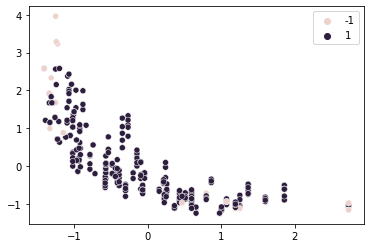

In [202]:
sns.scatterplot(X_train[:, 4], X_train[:, 7], hue=yhat)

In [203]:
mask = yhat == 1
X_train, y_train = X_train[mask, :], y_train[mask]

In [204]:
X_train.shape

(305, 13)

In [205]:
model = LinearRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_abs_err(y_test, yhat)
mae

3.270701400873643

### Local Outlier Factor:

In [206]:
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)

In [207]:
mask = yhat == 1
X_train, y_train = X_train[mask, :], y_train[mask]

In [208]:
X_train.shape

(281, 13)

In [209]:
model = LinearRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_abs_err(y_test, yhat)
mae

3.176076362774189

### Conclusion:

##### In this notebook we showed that the application of two simple preprocessing techniques to address outliers reduced our mean average error. We stared off with our baseline model with an MAE of 3.41, which was reduced to 3.27 with the application of the isolation forest algorithm. Next, we showed a further reduction down to MAE of 3.17 using the Local Outlier Factor.